<a href="https://colab.research.google.com/github/lfreedom2750/MathematicsForComputerScience/blob/main/BT2_23520899.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

### Load Data

In [2]:
# load package for loading data
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
housing_dataset = pd.read_csv('/content/drive/MyDrive/CS115/boston_housing.csv')
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [4]:
X = housing_dataset[['RM']]
y = housing_dataset[['MEDV']]

In [5]:
# load package for spliting data

from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Visualization

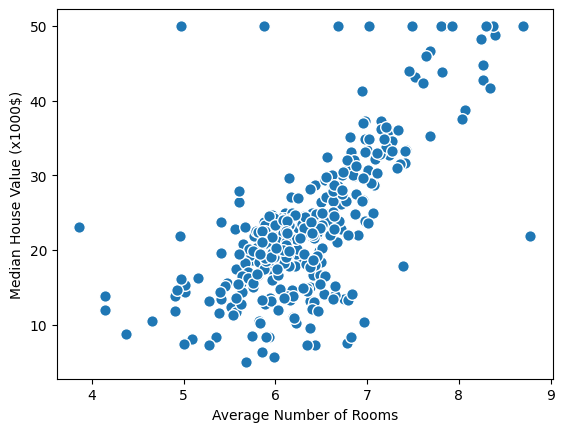

In [7]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Linear Regression (Base)

In [8]:
class LinearRegression:
   def __init__(self):
    self.w = None

   def predict(self, X):
    if X.shape[1] == len(self.w) - 1:
        X = np.c_[np.ones((X.shape[0], 1)), X]
    return np.dot(X, self.w)

   def fit(self, X, y):
    pass

### Gradient Descent

In [9]:
class GradientDescent(LinearRegression):
    def __init__(self, costs = [], eta = None, w = [], max_iter=200, random_state=42):
        super().__init__()
        self.costs = costs
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = w

    def fit(self, X, y):
        y = y.values.ravel()
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.costs = []

        for iter_i in range(self.max_iter):
            output = self.predict(X)
            errors = (y - output)

            self.w[0] += self.eta * np.sum(errors)
            self.w[1:] += self.eta * np.dot(X.T, errors)

            cost = np.sum(errors ** 2) / 2
            self.costs.append(cost)

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-76

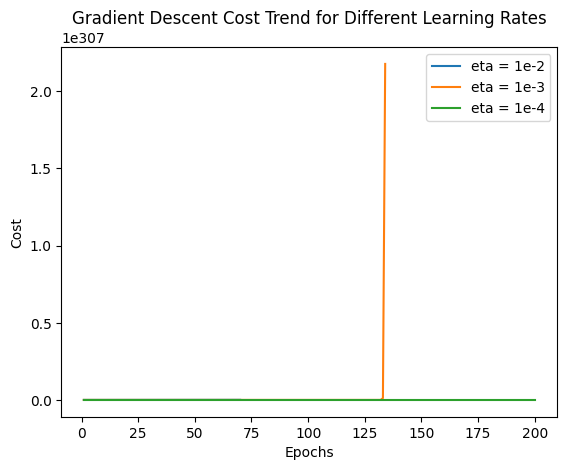

In [10]:
reg_GD_1 = GradientDescent(eta=1e-2, max_iter=200, random_state=42)
reg_GD_2 = GradientDescent(eta=1e-3, max_iter=200, random_state=42)
reg_GD_3 = GradientDescent(eta=1e-4, max_iter=200, random_state=42)

reg_GD_1.fit(X_train, y_train)
reg_GD_2.fit(X_train, y_train)
reg_GD_3.fit(X_train, y_train)

plt.plot(range(1, len(reg_GD_1.costs) + 1), reg_GD_1.costs, label='eta = 1e-2')
plt.plot(range(1, len(reg_GD_2.costs) + 1), reg_GD_2.costs, label='eta = 1e-3')
plt.plot(range(1, len(reg_GD_3.costs) + 1), reg_GD_3.costs, label='eta = 1e-4')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent Cost Trend for Different Learning Rates')
plt.legend()
plt.show()

The chart shows the cost trend for three different learning rate values (eta = 1e-2, eta = 1e-3, and eta = 1e-4):

* Learning rate eta = 1e-2 (blue): The cost remains very high, indicating that with this learning rate, gradient descent does not converge stably and may diverge instead. This makes this learning rate unsuitable.

* Learning rate eta = 1e-3 (orange): The cost spikes suddenly and reaches a very high level around epoch 125, showing that this learning rate is also too high, leading to divergence and preventing the model from converging stably.

* Learning rate eta = 1e-4 (green): The cost remains low and stable throughout 200 epochs, showing that this is a stable learning rate that helps the model converge consistently without divergence.

Conclusion: The most suitable learning rate is eta = 1e-4 because it allows the cost to decrease stably and does not cause divergence.

Visualize the prediction of Gradient Descent model on Training Data

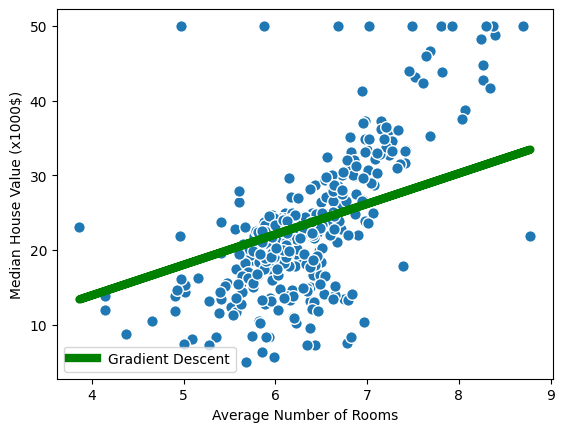

In [11]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD_3.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [12]:
from sklearn.linear_model import SGDRegressor

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [13]:
# Initialize the model
reg_SGD = SGDRegressor(max_iter=200, eta0=1e-4, random_state=42)

# Train model
reg_SGD.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.0001, max_iter=200, random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data

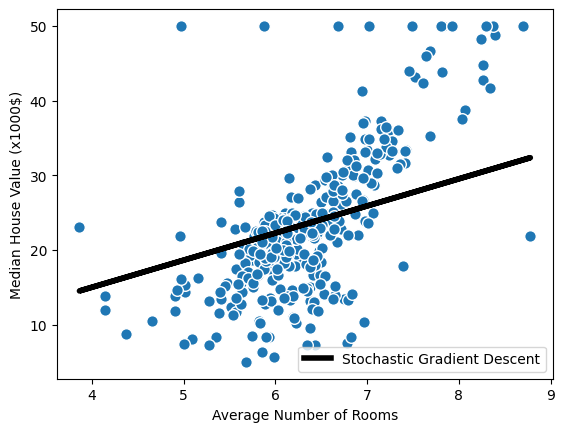

In [14]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg_NE = LinearRegression()
reg_NE.fit(X_train, y_train)

LinearRegression()

Visualize the prediction of Normal Equation model on Training Data

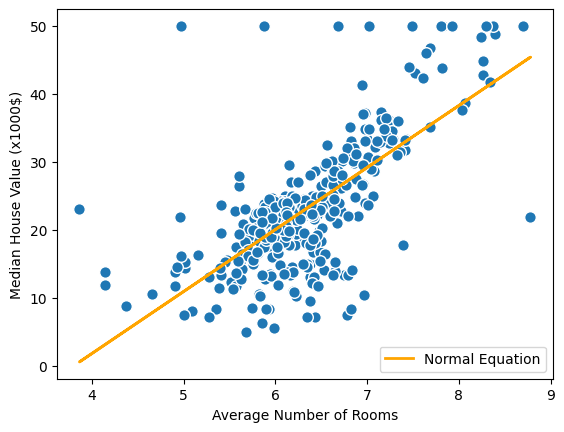

In [17]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

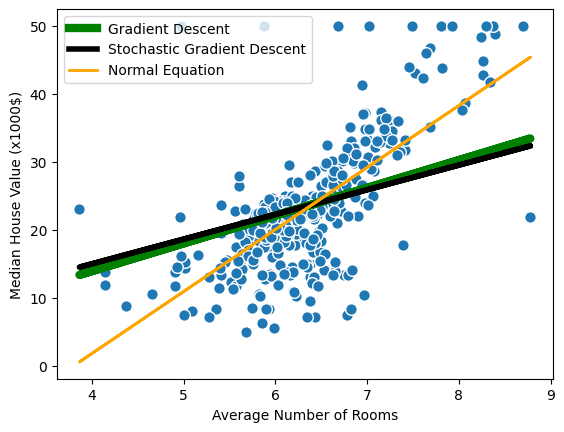

In [18]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD_3.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [19]:
w_GD = reg_GD_3.w
w_SGD = reg_SGD.coef_
w_NE = reg_NE.coef_
print(w_GD)
print(w_SGD)
print(w_NE)

[-2.39730964  4.08082808]
[3.62945908]
[[9.1181022]]


Performance Comparisons (on Testing Set)

In [20]:
y_pred_GD = reg_GD_3.predict(X_test)

In [21]:
y_pred_SGD = reg_SGD.predict(X_test)

In [22]:
y_pred_NE = reg_NE.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [24]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.280909
MAE of SGD: 5.413509
MAE of NE: 4.314224


**Đánh giá:** Kĩ thuật Normal Equation có MAE thấp nhất, có nghĩa là mô hình này có sai số tuyệt đối trung bình thấp nhất và có hiệu suất dự đoán chính xác hơn so với cả Gradient Descent và Stochastic Gradient Descent.

In [25]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 52.518172
MSE of SGD: 54.750232
MSE of NE: 40.35145


**Đánh giá:** Kĩ thuật Normal Equation cũng có Mean Squared Error thấp nhất, điều này cho thấy mô hình này có ít sai số bình phương lớn hơn, tức là nó không chỉ tốt trong việc giảm sai số tổng thể mà còn tránh được các sai số cực lớn.

In [26]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.295182
R2 of SGD: 0.265227
R2 of NE: 0.458465


**Đánh giá:** Kĩ thuật Normal Equation có R² cao nhất, cho thấy mô hình này giải thích tốt nhất sự biến động của dữ liệu, tức là mô hình này có thể mô phỏng dữ liệu tốt hơn so với GD và SGD.

**Đánh giá chung:**

Normal Equation (NE) hoạt động tốt nhất trong cả ba chỉ số MAE, MSE, và R², cho thấy đây là mô hình có hiệu suất cao nhất trong việc dự đoán và giải thích sự biến động của dữ liệu.
Gradient Descent (GD) và Stochastic Gradient Descent (SGD) đều kém hơn NE trong các chỉ số này, mặc dù chúng vẫn là các kỹ thuật mạnh mẽ trong các tình huống khác (ví dụ: khi làm việc với dữ liệu lớn hoặc phức tạp).

* GD có xu hướng hiệu quả hơn trong các bài toán với ít dữ liệu hơn hoặc khi cần một phương pháp tối ưu toàn cục, nhưng có thể chậm chạp và dễ bị mắc kẹt ở điểm cực tiểu cục bộ nếu không được tối ưu hóa đúng cách.
* SGD nhanh hơn nhưng có thể dẫn đến sự dao động lớn hơn trong kết quả và không ổn định như GD hoặc NE.

## Experiment with Standardized Data

In [27]:
# Re-load the dataset
housing_dataset = pd.read_csv('/content/drive/MyDrive/CS115/boston_housing.csv')

In [28]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [29]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [30]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset[['RM']]
y = housing_dataset[['MEDV']]

In [31]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

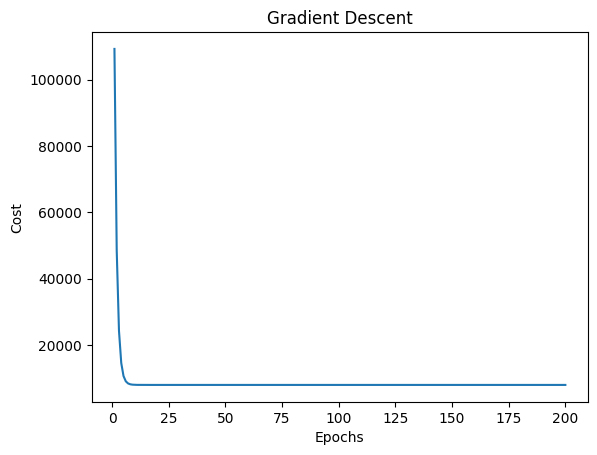

In [32]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = GradientDescent(eta=1e-3, max_iter=200, random_state=42)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



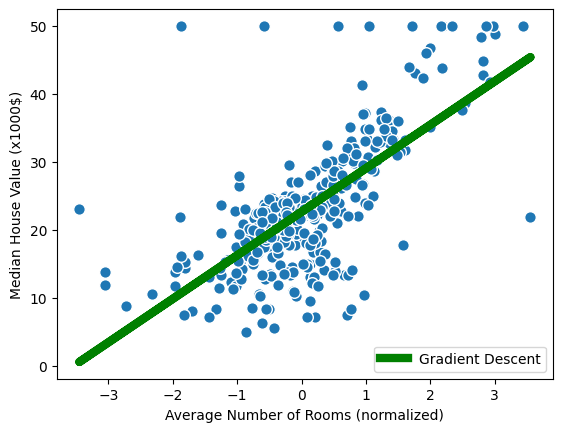

In [33]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [34]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = SGDRegressor(eta0=1e-3, max_iter=200, random_state=42, learning_rate='constant')

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=200,
             random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data


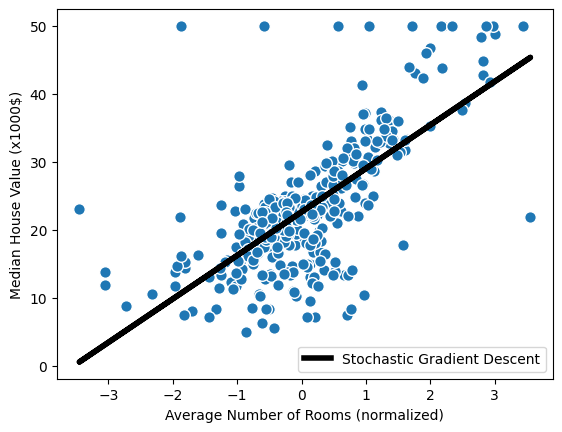

In [35]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

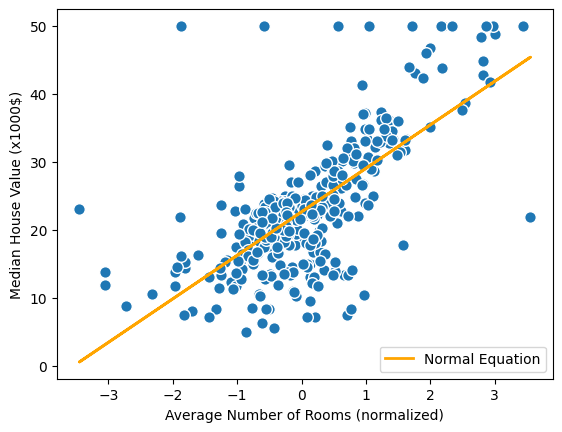

In [38]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

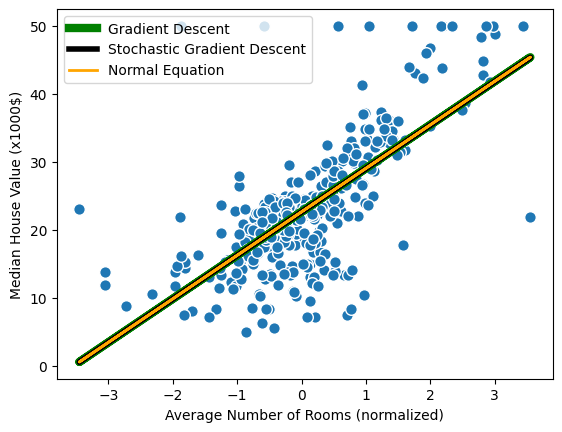

In [39]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [40]:
w_GD = reg_GD.w
w_GD

array([22.64163118,  6.40020122])

In [41]:
w_SGD = reg_SGD.coef_
w_SGD

array([6.39567675])

In [42]:
w_NE = reg_NE.coef_
w_NE

array([[6.40020122]])

In [43]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [44]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [45]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [46]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.314224
MAE of SGD: 4.312817
MAE of NE: 4.314224


**Đánh giá:** Các kĩ thuật GD và NE có MAE bằng nhau, trong khi SGD có MAE rất gần với GD và NE. Điều này cho thấy tất cả ba mô hình đều có sai số tuyệt đối tương đối giống nhau.

In [47]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 40.35145
MSE of SGD: 40.336472
MSE of NE: 40.35145


**Đánh giá:** Kĩ thuật SGD có MSE thấp hơn một chút so với GD và NE, nhưng sự khác biệt là rất nhỏ. Điều này cho thấy tất cả ba mô hình có độ chính xác khá tương đương trong việc giảm thiểu sai số bình phương.

In [48]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.458465
R2 of SGD: 0.458666
R2 of NE: 0.458465


**Đánh giá:** Kĩ thuật SGD có R² cao nhất, mặc dù sự khác biệt so với GD và NE là rất nhỏ. Điều này cho thấy SGD có khả năng giải thích sự biến động của dữ liệu một cách nhỉnh hơn một chút so với các mô hình còn lại.

**Đánh giá chung:**

- SGD có R² cao nhất và MSE thấp nhất trong ba mô hình, mặc dù sự khác biệt rất nhỏ.

- Các mô hình GD và NE có MAE và MSE gần như bằng nhau, nhưng SGD có chút cải thiện nhỏ trong các chỉ số này.

- Tất cả ba mô hình có hiệu suất gần như tương đương, với SGD có lợi thế nhỏ về khả năng giải thích sự biến động của dữ liệu.

# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [49]:
# Re-load dataset
housing_dataset = pd.read_csv('/content/drive/MyDrive/CS115/boston_housing.csv')

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [50]:
X = housing_dataset.drop('MEDV', axis=1)
y = housing_dataset['MEDV']

In [51]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in square
  cost = np.sum(errors ** 2) / 2
<ipython-input-9-7610f996675f>:23: RuntimeWarning: overflow encountered in squar

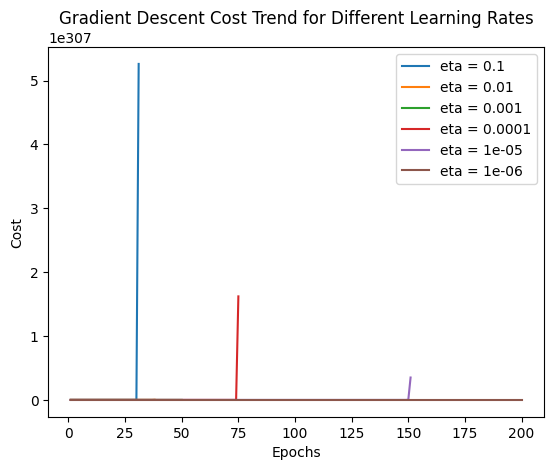

In [52]:
# Initalize the GD model
reg_GD_1 = GradientDescent(eta=1e-3, max_iter=200, random_state=42)
reg_GD_2 = GradientDescent(eta=1e-4, max_iter=200, random_state=42)
reg_GD_3 = GradientDescent(eta=1e-5, max_iter=200, random_state=42)
reg_GD_4 = GradientDescent(eta=1e-6, max_iter=200, random_state=42)
reg_GD_5 = GradientDescent(eta=1e-7, max_iter=200, random_state=42)
reg_GD_6 = GradientDescent(eta=1e-8, max_iter=200, random_state=42)


# Train model
reg_GD_1.fit(X_train, y_train)
reg_GD_2.fit(X_train, y_train)
reg_GD_3.fit(X_train, y_train)
reg_GD_4.fit(X_train, y_train)
reg_GD_5.fit(X_train, y_train)
reg_GD_6.fit(X_train, y_train)

# Visualize the cost trend
for i in range(1, 7):
    plt.plot(range(1, len(eval(f'reg_GD_{i}').costs) + 1), eval(f'reg_GD_{i}').costs, label=f'eta = {10 ** (-i)}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent Cost Trend for Different Learning Rates')
plt.legend()
plt.show()

The most suitable learning rate value based on the chart is η = 1e-06. Here's a summary of the findings:

* Higher learning rates, such as 0.1, 0.01, and 0.001, show significant instability, causing sharp increases in cost or divergence.
* The learning rate η = 1e-04 (0.0001) also causes some instability, although less severe than the larger values. It still results in cost spikes, indicating it's still too high for stable gradient descent.
* The learning rates 1e-05 and 1e-06 demonstrate stability, with η = 1e-06 being the most stable without any noticeable cost spikes.

Thus, η = 1e-06 is the optimal choice for this setup, offering the most stable and reliable performance.

### Stochastic Gradient Descent

In [53]:
# Initialize the SGD model
reg_SGD = SGDRegressor(max_iter=200, eta0=1e-4, random_state=42, learning_rate='constant')

# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=42)

### Normal Equation

In [54]:
# Add the '1' column to data
X_train_add1 = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_add1 = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [55]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_add1, y_train)

LinearRegression()

### Algorithms Comparisons

In [56]:
w_GD = reg_GD.w
w_GD

array([22.64163118,  6.40020122])

In [57]:
w_SGD = reg_SGD.coef_
w_SGD

array([ 1.00528570e+10, -2.51840030e+10, -3.69668634e+10, -7.26356722e+08,
       -7.41972805e+08, -8.11241489e+09, -2.12235025e+10,  5.70644406e+08,
        9.83329328e+09, -3.03330849e+10, -1.67708049e+10, -5.37862137e+10,
       -1.26639904e+10])

In [58]:
w_NE = reg_NE.coef_
w_NE

array([ 0.00000000e+00, -1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
        3.11983512e+00, -1.54170609e+01,  4.05719923e+00, -1.08208352e-02,
       -1.38599824e+00,  2.42727340e-01, -8.70223437e-03, -9.10685208e-01,
        1.17941159e-02, -5.47113313e-01])

In [59]:
y_pred_GD = reg_GD_6.predict(X_test)

In [60]:
y_pred_SGD = reg_SGD.predict(X_test)

In [61]:
y_pred_NE = reg_NE.predict(X_test_add1)

In [62]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 6.391988
MAE of SGD: 33809241573006.316
MAE of NE: 3.16271


**Đánh giá:**

- MAE của SGD rất cao so với GD và NE, điều này cho thấy SGD có sai số tuyệt đối rất lớn, có thể do một số vấn đề về dữ liệu hoặc cách tối ưu hóa của mô hình không ổn định.

- MAE của NE thấp nhất, cho thấy mô hình NE dự đoán chính xác hơn cả, mặc dù có thêm cột số 1 trong dữ liệu.

In [63]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 70.066239
MSE of SGD: 1.1726826359741318e+27
MSE of NE: 21.517444


**Đánh giá:**

- MSE của SGD cũng cực kỳ lớn, điều này có thể chỉ ra rằng SGD gặp phải vấn đề nghiêm trọng về việc tối ưu hóa, dẫn đến các giá trị sai số cực lớn (có thể do tỷ lệ học quá cao hoặc sự dao động không kiểm soát được trong quá trình huấn luyện).

- MSE của NE vẫn là thấp nhất, chứng tỏ rằng mặc dù NE có thêm một cột số 1 (có thể là một yếu tố điều chỉnh bias), mô hình vẫn ổn định và có khả năng dự đoán tốt hơn các mô hình còn lại.

In [64]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.059679
R2 of SGD: -1.573794011692944e+25
R2 of NE: 0.711226


**Đánh giá:**

- R² của SGD có giá trị rất thấp, âm rất lớn, điều này cho thấy mô hình này không giải thích được sự biến động của dữ liệu và kết quả hoàn toàn không tốt. Đây là một dấu hiệu rõ ràng cho thấy SGD gặp phải vấn đề nghiêm trọng trong quá trình tối ưu hóa (có thể do tốc độ học quá lớn hoặc quá trình huấn luyện không ổn định).

- R² của NE đạt 0.711226, cho thấy NE có khả năng giải thích sự biến động của dữ liệu khá tốt, điều này khẳng định rằng NE đang hoạt động ổn định và hiệu quả trong việc tối ưu hóa mô hình.

**Đánh giá chung:**

- SGD gặp phải vấn đề nghiêm trọng, với MAE và MSE cực kỳ cao và R² âm rất lớn. Điều này có thể do một số lý do như quá trình huấn luyện không ổn định, quá trình tối ưu hóa kém, hoặc giá trị học không phù hợp.

- GD có MAE và MSE tốt hơn SGD, nhưng vẫn kém hơn NE.

- NE vẫn là mô hình tốt nhất với MAE, MSE thấp và R² cao, cho thấy NE hoạt động ổn định và có khả năng giải thích sự biến động của dữ liệu một cách tốt hơn cả.

## Experiment with Standardized Data

In [65]:
# Re-load dataset
housing_dataset = pd.read_csv('/content/drive/MyDrive/CS115/boston_housing.csv')

In [66]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [67]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [68]:
X_new = housing_dataset[name_columns[:-1]]
y = housing_dataset['MEDV']

In [69]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

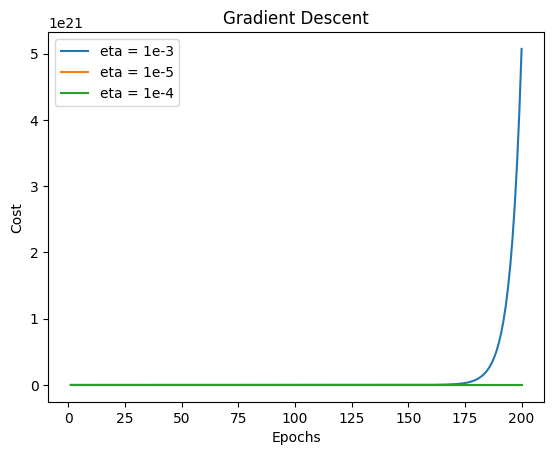

In [70]:
# Initalize the GD model
reg_GD_1 = GradientDescent(eta=1e-3, max_iter=200, random_state=42)
reg_GD_2 = GradientDescent(eta=1e-5, max_iter=200, random_state=42)
reg_GD_3 = GradientDescent(eta=1e-4, max_iter=200, random_state=42)

# Train model on normalized data
reg_GD_1.fit(X_train_norm, y_train)
reg_GD_2.fit(X_train_norm, y_train)
reg_GD_3.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD_1.costs) + 1), reg_GD_1.costs, label='eta = 1e-3')
plt.plot(range(1, len(reg_GD_2.costs) + 1), reg_GD_2.costs, label='eta = 1e-5')
plt.plot(range(1, len(reg_GD_3.costs) + 1), reg_GD_3.costs, label='eta = 1e-4')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [71]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = SGDRegressor(eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')

# Train model
reg_SGD.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=42)

### Normal Equation (sklearn)

In [72]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

### Algorithms Comparisons

In [73]:
w_GD = reg_GD.w
w_GD

array([22.64163118,  6.40020122])

In [74]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([22.47521194, -0.94717769,  0.40179183, -0.05520802,  0.86619346,
       -1.10632008,  3.09329047, -0.39409591, -2.22833111,  0.87743613,
       -0.31647518, -1.86700159,  1.0987754 , -3.78831503])

In [75]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [76]:
y_pred_GD = reg_GD_3.predict(X_test_norm)

In [77]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [78]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [79]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 3.207306
MAE of SGD: 3.207579
MAE of NE: 3.16271


**Đánh giá:**

- MAE của NE thấp nhất, cho thấy mô hình Normal Equation dự đoán chính xác nhất trong ba mô hình.

- MAE của GD và SGD rất gần nhau, với sự chênh lệch nhỏ. Tuy nhiên, NE vẫn có sự cải thiện nhẹ về sai số tuyệt đối.

In [80]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 22.914828
MSE of SGD: 22.927133
MSE of NE: 21.517444


**Đánh giá:**

- MSE của NE thấp nhất, điều này chỉ ra rằng NE có khả năng giảm thiểu sai số bình phương tốt hơn GD và SGD.
- GD và SGD có giá trị MSE gần nhau, cho thấy cả hai mô hình này có độ chính xác tương tự về tổng thể.

In [81]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.692472
R2 of SGD: 0.692307
R2 of NE: 0.711226


**Đánh giá:**

- R² của NE cao nhất, cho thấy mô hình NE giải thích sự biến động của dữ liệu tốt nhất. Đây là một chỉ số mạnh mẽ cho thấy NE là mô hình có khả năng dự đoán chính xác hơn.

- R² của GD và SGD rất gần nhau, tuy nhiên NE có lợi thế trong việc giải thích sự biến động của dữ liệu.

**Đánh giá chung:**

- Normal Equation (NE) vẫn thể hiện hiệu suất tốt nhất trong ba mô hình về tất cả các chỉ số MAE, MSE, và R². Điều này cho thấy NE có khả năng dự đoán chính xác và giải thích sự biến động của dữ liệu tốt hơn so với Gradient Descent (GD) và Stochastic Gradient Descent (SGD).

- GD và SGD có kết quả khá gần nhau trong các chỉ số, nhưng đều kém hơn NE một chút về độ chính xác và khả năng giải thích sự biến động trong dữ liệu.

# Explain what $R^2$ coefficient is.

### Definition of the Coefficient of Determination $R^2$

The coefficient of determination, or $R^2$, is a measure that provides information about the goodness of fit of a model. In the context of regression, it is a statistical measure of how well the regression line approximates the actual data. $R^2$ is important when a statistical model is used either to predict future outcomes or in hypothesis testing.

There are several variants of $R^2$; the one presented here is widely used:

$$
R^2 = 1 - \frac{\text{SSR}}{\text{SST}} = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y})^2}
$$

In this formula:
- **SSR (Sum of Squared Regression)**: The sum of squared residuals, which is the sum of the squared differences between observed and predicted values.
- **SST (Total Sum of Squares)**: The total sum of squared differences between observed values and their mean.

Since $R^2$ represents a percentage, its values range between 0 and 1.

### Interpretation of the $R^2$ Value

- **$R^2$ = 1**: All of the variation in the $y$ values is fully explained by the $x$ values. This indicates a perfect fit of the model to the data.

- **$R^2$ = 0.5**: 50% of the variation in the $y$ values is explained by the $x$ values. This indicates a moderate fit, where the model captures half of the variance in the dependent variable, but there remains significant unexplained variance.

- **$R^2$ = 0**: None of the variation in the $y$ values is explained by the $x$ values, meaning the model does not explain the relationship between the variables.

### Note on $R^2$

An interesting property of $R^2$ is that it tends to increase as more variables are added to the model. For instance, if we added another variable such as the average height of lecturers, the $R^2$ would not decrease and might even increase by chance, even if this addition does not improve the model. To address this, an adjusted version of $R^2$, called the **Adjusted $R^2$**, is often used to account for the number of variables.

### References
- For more details on correlation and $R^2$, refer to the [StatsTutor resource](http://www.statstutor.ac.uk/resources/uploaded/correlation.pdf).
- Alissa Grant-Walker’s video on calculating the coefficient of determination.
- Khan Academy’s video on working with the coefficient of determination.
- [Newcastle University’s explanation on the coefficient of determination](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html).


**Ghi chú:**

- Khi Thầy xem notebook này trên một số ứng dụng hay trình duyệt như Visual Studio Code, các bảng dữ liệu trước và sau khi xử lý có thể không hiện ra. Nên em đã up notebook này lên github cũng như đặt đường link share của notebook này trên colab với chế độ Viewer.

Github: https://github.com/lfreedom2750/MathematicsForComputerScience/blob/main/BT2_23520899.ipynb

Google Colab: https://drive.google.com/file/d/1UliZYqKQ8XesEk3sjTAsHErx7AlX6O-W/view?usp=sharing